# Module 5 Homework 1

In [166]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc

from dmba import classificationSummary 

# 1. Import

Import the processed.cleveland.data dataset (attached) and create column names of 14 attributes as indicated in this link: https://archive.ics.uci.edu/ml/datasets/Heart+Disease. Print the head of your dataframe and the percent of each outcome class in the num column (e.g.,  use the value_counts() function). Did you notice any class imbalance?

In [109]:
hd = pd.read_csv('processed.cleveland.data',header=None)

column_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
new_names = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
old_names = hd.columns[column_indices]
hd.rename(columns=dict(zip(old_names, new_names)), inplace=True)
hd.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


The last colume "num" is the diagnosis of heart disease (angiographic disease status)

0 : no diagnosis
1-4 : heart disease diagnosis

In [110]:
hd['num'].value_counts(normalize=True)

0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: num, dtype: float64

# 2. Preprocess the data
    
    a) Modify your target column (the num column) and set 1 for outcomes 1, 2, 3, 4, and 0 otherwise. Print the percentage of each outcome class from the reformatted target. How is the class imbalance now?
    
    b) Drop all rows with missing values (a missing value is epresented by a question mark '?')
    
    c) Set the ca column to float.
    
    d) Get_dummies for the dataframe—this operation is mostly meant for the thal column since it is nominal.
    
    e) Set your target column to the data type of 'category'.
    
    f) Print dtypes of your dataframe to ensure that all predictors are either float or integer.


In [111]:
hd['num'].replace({2: 1, 3: 1, 4: 1}, inplace=True)
hd['num'].value_counts(normalize=True)

0    0.541254
1    0.458746
Name: num, dtype: float64

In [112]:
hd.drop(index=(hd[hd.isin(['?']).any(axis=1)].index), inplace=True)
hd.shape

(297, 14)

In [113]:
hd['ca'] = hd['ca'].astype(float)

In [114]:
hd.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal         object
num           int64
dtype: object

In [115]:
hd_new = pd.get_dummies(hd, prefix_sep='_', drop_first=True)
hd_new['num'] = hd_new['num'].astype("category")
hd_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num,thal_6.0,thal_7.0
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,0,1,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,1,0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1,0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,1,0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,1,0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,1,0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,1,0,1


# 3.  Train an ANN model using Sklearn
    
    a) Partition your data into 60% percent training, 40% percent validation.
    
    b) Use the Sklearn GridSearchCV() function to search for the best number of nodes in one hidden layer (search between 1 and 10 nodes), and then print and plot the gridsearch results.
    
    c) Use MLPClassifier() to train your model.  Set hidden_layer_sizes=(the best number of nodes that you found in b). Use the relu activation function and the lbfgs solver. Print your train and validation confusion matrices (e.g., use the classificationSummary() function in Sklearn). How did your model perform?


In [119]:
# create a list of predictor variables by remvoing output variables and text columns
excludeColumns = ('num')
predictors = [s for s in hd_new.columns if s not in excludeColumns]
outcome = 'num'

# partition data
X = hd_new[predictors]
y = hd_new[outcome]

classes = ['normal','abnormal']

# training (60%) and validation (40%)
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


In [130]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': list(range(1, 10)),
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1) # n_jobs=-1 will utilize all available CPUs 

gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.7868253968253969
Initial parameters:  {'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [136]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(1, 10)), # 14 values
    'min_samples_split': list(range(3, 12)), # 11 values
    'min_impurity_decrease': [0.01, 0.011, 0.012], # 3 values
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  0.8153968253968253
Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 0.01, 'min_samples_split': 3}


In [144]:
###
classes = sorted(y.unique())
clf = MLPClassifier(hidden_layer_sizes=(3), activation='relu', solver='lbfgs', max_iter=1000, random_state=1)
clf.fit(train_X, train_y)
clf.predict(train_X)


array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1])

In [145]:
print("Training Classification Summary:")

classificationSummary(train_y, clf.predict(train_X), class_names=classes) 

print("---")
print("Validation Classification Summary:")
classificationSummary(valid_y, clf.predict(valid_X), class_names=classes) 


Training Classification Summary:
Confusion Matrix (Accuracy 0.9157)

       Prediction
Actual  0  1
     0 85  8
     1  7 78
---
Validation Classification Summary:
Confusion Matrix (Accuracy 0.7899)

       Prediction
Actual  0  1
     0 53 14
     1 11 41


# 4. ANN Model 

Follow the module's example to create an ANN model using Keras--use the same data partition as in the Sklearn model.
    
    a) Use the relu activation function in the hidden layer and the sigmoid activation function in the output layer.
    
    b) When compiling your model, use the 'adam' optimizer.
    
    c) Print and plot your model; to plot your model, use keras_visualizer.
    
    d) Print the confusion matrix of your model. Optionally, try to add more layers and change the number of nodes in your dense layers to see how the performance of your model changes. You can also experiment with and without the bias variable to the model.
    
    e) Submit an image of your final model separately from your notebook file.

In [152]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras_visualizer import visualizer 

# Neural network
model = Sequential()

model.add(Dense(16, input_dim=14, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid')) #sigmoid since this is binary classifiction
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                204       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


In [154]:
visualizer(model, filename='ann_model_graph', format='png')

In [155]:
#compile the model
model.compile(Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy']) #lr = learning rate

In [163]:
#train the model
history = model.fit(train_X, train_y, epochs=100, batch_size=64, validation_data = (valid_X,valid_y))


Epoch 1/100
3/3 [==============================] - 1s 304ms/step - loss: 0.4886 - accuracy: 0.7697 - val_loss: 0.5940 - val_accuracy: 0.7059
Epoch 2/100
3/3 [==============================] - 0s 22ms/step - loss: 0.4792 - accuracy: 0.7753 - val_loss: 0.5913 - val_accuracy: 0.7143
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.4771 - accuracy: 0.7697 - val_loss: 0.5952 - val_accuracy: 0.7143
Epoch 4/100
3/3 [==============================] - 0s 26ms/step - loss: 0.4722 - accuracy: 0.7697 - val_loss: 0.5914 - val_accuracy: 0.7143
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.4716 - accuracy: 0.7697 - val_loss: 0.5947 - val_accuracy: 0.7227
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.4691 - accuracy: 0.7753 - val_loss: 0.5828 - val_accuracy: 0.7311
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.4619 - accuracy: 0.7753 - val_loss: 0.5894 - val_accuracy: 0.7311
Epoch 8/100
3/3 [==

3/3 [==============================] - 0s 19ms/step - loss: 0.3612 - accuracy: 0.8483 - val_loss: 0.5337 - val_accuracy: 0.7647
Epoch 60/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3598 - accuracy: 0.8596 - val_loss: 0.5422 - val_accuracy: 0.7899
Epoch 61/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3596 - accuracy: 0.8539 - val_loss: 0.5300 - val_accuracy: 0.7563
Epoch 62/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3586 - accuracy: 0.8483 - val_loss: 0.5208 - val_accuracy: 0.7731
Epoch 63/100
3/3 [==============================] - 0s 16ms/step - loss: 0.3569 - accuracy: 0.8596 - val_loss: 0.5292 - val_accuracy: 0.7731
Epoch 64/100
3/3 [==============================] - 0s 15ms/step - loss: 0.3553 - accuracy: 0.8539 - val_loss: 0.5263 - val_accuracy: 0.7731
Epoch 65/100
3/3 [==============================] - 0s 17ms/step - loss: 0.3582 - accuracy: 0.8539 - val_loss: 0.5278 - val_accuracy: 0.7647
Epoch 66/100
3/3 [========

Text(0.5, 0, 'epoch')

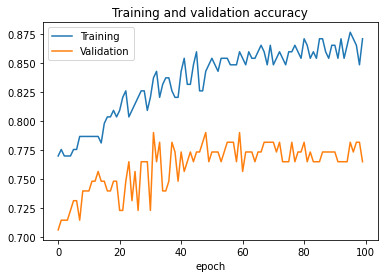

In [164]:
import matplotlib.pyplot as plt

#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

# 5. Compare

Compare the performance of both your Sklearn and Keras models (e.g., use the accuracy metric or plot the gain or ROC chart). What can you conclude?

Both models got very similar results.

### ANN Model

- Training Classification Summary: Accuracy 0.9157
- Validation Classification Summary: Accuracy 0.7899

### Keras Model

We can see with 100 epoch, the curves above indicate similar accuracy:

- Training Accuracy: 0.86
- Validation Accuracy: 0.77


## ROC Charts

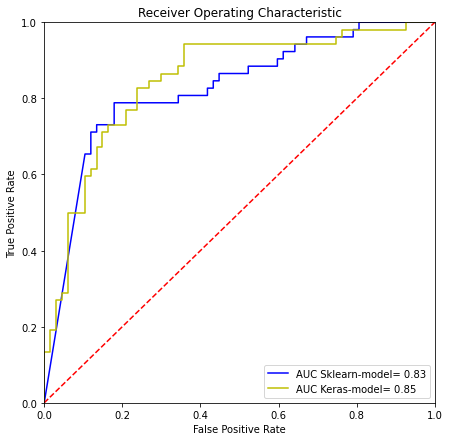

In [169]:
pred_y1 = clf.predict_proba(valid_X)[:,1]#sklearn
pred_y2 = model.predict(valid_X)#keras
fpr1, tpr1, threshold1 = roc_curve(valid_y,pred_y1)
fpr2, tpr2, threshold2 = roc_curve(valid_y,pred_y2)
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC Sklearn-model= %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'y', label = 'AUC Keras-model= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()